Один из трех блоков ниже выбирается для исследования экситонных волновых функций в одном из потенциалов с известными калибровочными положениями экситонных пиков поглощения в спектре. В блоках заданы параметры потенциала Кронига-Пенни $a,b,V_0$:

\begin{equation}
V_{KP}(x) =
\begin{cases}
   0 & \text{0 < x < a}\\
   V_0 & \text{-b < x < 0},
\end{cases}
\label{eqn:KronigPenny}
\end{equation}

величины разбиения первой зоны Бриллюэна и элементарной ячейки $N, N_r$, а также параметры в ядрах и формуле построения оптического спектра.

In [32]:
a = 3.             #width of a well
b = 3.             #width of a barrier
V = 1.0             #height of a barrier
N = 401               #fragmentation of Brillouin zone from 0 to pi/(a+b)
N_r = 80                   #fragmentation of lattice (for counting integrals in F)
A_SC = 0.955*0.9                #parameter in SC kernel
alph = 0.01                #another parameter in SC
A_cont = 3.77*0.89             #parameter in contact kernel
A_LR = 6.2               #parameter in long-range kernel
q = 0.024                #small but finite parameter in exp for spectra counting
eta = 0.0035            #blur of spectra peaks
fr_end = 0.4            #maximum frequency in spectra graph
exc = 0.157 #0.071 

In [64]:
a = 0.5
b = 0.5 
V = 20.0  
N = 451 
N_r = 80 
A_SC = 2.39*4.1
alph = 0.01 
A_cont = 10.   
A_LR = 18.4
q = 0.7
eta = 0.08
fr_end = 5.
exc = 2.05

In [23]:
a = 2.6 
b = 0.4 
V = 8.0  
N = 451 
N_r = 80
A_SC = 0.898*1.4
alph = 0.01
A_cont = 3.7
A_LR = 6.02
q = 0.03
eta = 0.009
fr_end = 2.
exc =  0.387

In [65]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.integrate import simps
from scipy.integrate import trapz
import cmath
Volume = numpy.sqrt(N)*(a+b)
E_k = lambda E: (cmath.cos(cmath.sqrt(2*E)*a) * cmath.cosh(b * cmath.sqrt(2 * V - 2 * E)) + \
                   (V / (2*E) - 1.) / cmath.sqrt(V/E - 1.) * cmath.sinh(cmath.sqrt(2*V - 2*E)*b) * \
                    cmath.sin(cmath.sqrt(2*E)*a) - cmath.cos(k * (a+b))).real
k_map = numpy.linspace(-numpy.pi/(a+b),numpy.pi/(a+b),N)
r_map = numpy.linspace(-b,a,N_r)
for i in range (0, N_r):
    if (r_map[i]<=0):
        N_0 = i
h = r_map[1] - r_map[0]
Spectra = []
method = -1
name = []

Блок построения зонной структуры - аналогичен таковому в программе TDDFT_for_excitons.

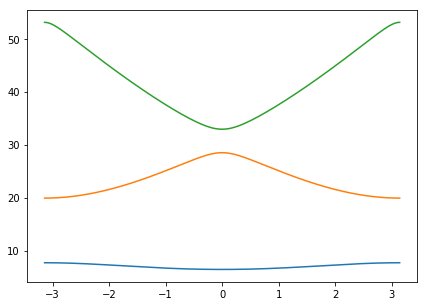

Band gap =
4.43251511869747


In [66]:
plt.rcParams['figure.figsize'] = [7,5]
Func = lambda E: cmath.cos(cmath.sqrt(2*E)*a) * cmath.cosh(b * cmath.sqrt(2 * V - 2 * E)) + \
                   (V / (2*E) - 1.) / cmath.sqrt(V/E - 1.) * cmath.sinh(cmath.sqrt(2*V - 2*E)*b) * \
                    cmath.sin(cmath.sqrt(2*E)*a)
E_border = numpy.zeros(6)
E_map = numpy.zeros((N,3))
e = 0.; zone = 0; checker = False
while zone < 3:
    e = e + V/1000.
    if abs(Func(e))<=1 and checker == False:
        E_border[2*zone] = e
        checker = True
    if abs(Func(e))>1 and checker == True:
        E_border[2*zone+1] = e - V/1000.
        checker = False
        zone = zone + 1
fig,ax = plt.subplots()
for zone in range (0,3):
    for i in range (0,N):
        k = k_map[i]
        l = opt.fsolve(E_k, (E_border[2*zone+1] + E_border[2*zone])/2.)
        E_map[i,zone] = l[0]
    ax.plot(k_map, E_map[:,zone])
plt.show()
print('Band gap =')
print(E_map[N//2,2]-E_map[N//2,1])

Блок расчета дискретизированных значений волновых функций по разбиению по элементарной ячейке решетки - аналогичен таковому в программе TDDFT_for_excitons.

In [67]:
#alternatively counts fi(x) for intermediate coordinates
fi = numpy.zeros((N_r,N,2),dtype = complex)
fi_alt = numpy.zeros((N_r-1,N,2),dtype = complex)
opt = numpy.zeros((N,4),dtype = complex)
r_map_alt = r_map[:-1] + h/2.
for i in range (0, N_r-1):
    if (r_map[i]<=0.):
        N_0_alt = i
X_full = [[],[]]
for zone in range (0,2):
    opt[:,zone] = numpy.sqrt(2.*E_map[:,zone+1])
    opt[:,zone+2] = numpy.sqrt(2.*(E_map[:,zone+1] - V), dtype=complex)
for z in range (0,2):
    for i in range (0,N):
        k = k_map[i]
        A = numpy.array([[1.,1.,-1.],[-opt[i,z],opt[i,z],opt[i,z+2]],[cmath.exp(-1.j*k*(a+b)-1.j*a*opt[i,z]),\
                            cmath.exp(-1.j*k*(a+b)+1.j*a*opt[i,z]),-cmath.exp(1.j*opt[i,z+2]*b)]],dtype=complex)
        B = numpy.array([1.,opt[i,z+2],cmath.exp(-1.j*opt[i,z+2]*b)],dtype=complex)
        X=numpy.linalg.solve(A,B)
        X = numpy.append(X[:], [1.])
        X_full[z].append(X)
X_full = numpy.array(X_full)
for z in range (0,2):
    for x in range (0,N_0):
        fi[x,:,z] = X_full[z,:,2]*numpy.exp(-1.j*opt[:,z+2]*r_map[x],dtype=complex)+\
            X_full[z,:,3]*numpy.exp(1.j*opt[:,z+2]*r_map[x],dtype=complex)
    for x in range (0,N_0_alt):
        fi_alt[x,:,z] = X_full[z,:,2]*numpy.exp(-1.j*opt[:,z+2]*r_map_alt[x],dtype=complex)+\
            X_full[z,:,3]*numpy.exp(1.j*opt[:,z+2]*r_map_alt[x],dtype=complex)
    for x in range (N_0,N_r):
        fi[x,:,z] = X_full[z,:,0]*numpy.exp(-1.j*opt[:,z]*r_map[x],dtype=complex)+\
            X_full[z,:,1]*numpy.exp(1.j*opt[:,z]*r_map[x],dtype=complex)
    for x in range (N_0_alt,N_r-1):
        fi_alt[x,:,z] = X_full[z,:,0]*numpy.exp(-1.j*opt[:,z]*r_map_alt[x],dtype=complex)+\
            X_full[z,:,1]*numpy.exp(1.j*opt[:,z]*r_map_alt[x],dtype=complex)
    for i in range (0,N):
        norm = simps(abs(fi[:,i,z])**2,x=None,dx=h)
        fi[:,i,z] = fi[:,i,z] * cmath.sqrt((a+b)/norm)
        norm = simps(abs(fi_alt[:,i,z])**2,x=None,dx=h)
        fi_alt[:,i,z] = fi_alt[:,i,z] * cmath.sqrt((a+b)/norm)

Этот блок использует уравнение на получение энергии возбуждения трионов:

\begin{equation}
    \omega_{tr} t_{\mathbf{k_1 q q}} = \sum_{\mathbf{p_1}}[(\epsilon_{\mathbf{p_1}}^c + \omega_{exc})\delta_{\mathbf{k_1 p_1}} + F^{cvvc}_{\mathbf{k_1 q q p_1}} + w^{cccc}_{\mathbf{k_1 q p_1 q}}] t^{ccv}_{\mathbf{p_1 q q}}
\end{equation},
где $\omega_{exc}$ - положение рассматриваемого экситона (как компоненты триона) в оптическом спектре поглощения. Естественно, что если энергия получения триона будет меньше, чем экситона в нем, экситон и электрон могут образовать энергетически-выгодное связанное состояние.

В уравнении выше введены величины F и w, которые определены как

\begin{equation}
    F^{cvvc}_{\mathbf{k_1 k_2 p_1 p_2}} = \frac{2}{N \Omega_0^2} \int d^3 r d^3 r' \psi^{c*}_{\mathbf{k_1}}(\mathbf{r_1}) \psi^{v}_{\mathbf{k_2}} (\mathbf{r_2}) f_{xc}(\mathbf{r_1},\mathbf{r_2}) \psi^c_{\mathbf{p_1}}(\mathbf{r_1}) \psi^{v*}_\mathbf{p_2} (\mathbf{r_2}),
\label{eqn:F}
\end{equation}
то есть, электрон и дырка, изначально обладающие квазиимпульсами $\mathbf{k_1}$ и $\mathbf{k_2}$ соответственно, после рассеяния будут обладать квазиимпульсами $\mathbf{p_1}$ и $\mathbf{p_2}$

\begin{equation}
    w^{cccc}_{\mathbf{k_1 k_2 p_1 p_2}} =\frac{2}{N \Omega_0^2} \frac{1}{\epsilon_{ee}} \int d^3 r d^3 r' \psi_\mathbf{k_1}^{c*} (\mathbf{r}) \psi_\mathbf{k_2} ^{c*} (\mathbf{r'}) \frac{1}{|\mathbf{r}-\mathbf{r'}|} \psi^c_\mathbf{p_1} (\mathbf{r}) \psi_\mathbf{p_2}^{c} (\mathbf{r'}).
\label{eqn:w}
\end{equation}
Здесь $\epsilon_{ee}$ - эффективный параметр электрон-электронного экранирования среды.

Полученные в программе TDDFT_for_excitons энергии связи экситонов и соответствующие им параметры в обменно-корреляционных ядрах были использованы в уравнении выше с целью позиционирования трионных пиков в оптическом спектре поглощения среды, а также определения энергии связи полученных трионов.
Поскольку матрицы $F^{cvvc}_{k_1 q q p_1}$ описывают взаимодействие между электроном и дыркой (принадлежащей экситону), то параметры в ядрах связаны с эффективной диэлектрической проницаемостью среды, соответствующей экранированию электрон-дырочного кулоновского взаимодействия. Из этого можно сделать вывод, что здесь нужно использовать тот же параметр ядра A, как и при получении экситонов в программе TDDFT_for_excitons с помощью уравнения Ванье.

Теперь мы имеем уравнение, в котором варьируются следующие величины: эффективный коэффициент электро-электронного экранирования $\epsilon_{ee}$ (переменная Eps_ee), квазиимпульс электрона и дырки в экситоне $q$ (переменная Kq), энергия связи экситона и используемое обменно-корреляционное ядро.

In [77]:
ee3 = []
trion3 = []
Eps_ee = 1.
Kq = (N * 24) // 32 - 1
F_0 = numpy.zeros((N,N), dtype = complex)
def R_func(x,r): return A_SC * ((r_map[x]-r_map[r])**2+alph)**(-0.5) * fi[r,Kq,0] * fi[x,Kq,1]
R_SC = numpy.fromfunction(R_func, (N_r,N_r), dtype = int)
def f_func(r,j): return simps(-fi[:,j,1].conj()*R_SC[:,r],x=None,dx=h,axis=0)
f_SC = numpy.fromfunction(f_func, (N_r,N), dtype = int)
def F_func(i,j): return simps(f_SC[:,j]*fi[:,i,0].conj(),x=None,dx=h,axis=0)*2/Volume**2
F_0 = numpy.fromfunction(F_func,(N,N), dtype = int)
w = numpy.zeros((N,N), dtype = complex)

for numb in range (0, 40):
    Eps_ee = Eps_ee + 0.5
    def w_func(x,r): return fi_alt[r,Kq,1].conj() * fi_alt[r,Kq,1] / (Eps_ee * abs(r_map[x]-r_map_alt[r]))
    w_LR = numpy.fromfunction(w_func, (N_r,N_r-1), dtype = int)
    def f_func(x): return simps(w_LR[x,:],x=None,dx=h,axis=1)       #unsure about axis here
    f_SC = numpy.array([numpy.fromfunction(f_func, (N_r,), dtype = int)]).T.dot(numpy.array([numpy.ones(N)]))
    def F_func(i,j): 
        return simps(f_SC[:,numpy.zeros((N,N),dtype = int)]*fi[:,i,1].conj()*fi[:,j,1],x=None,dx=h,axis=0)*2/Volume**2
    F = F_0 + numpy.fromfunction(F_func,(N,N), dtype = int) + numpy.diag(E_map[:,2] + exc)
    fr,v = numpy.linalg.eigh(F)
    if (fr[0]< E_map[N//2,2]-E_map[N//2,1]):
        ee3.append(Eps_ee)
        trion3.append(fr[0])
    
#plt.rcParams['figure.figsize'] = [7,5]
#x, y = numpy.meshgrid(k_map, k_map)
#fig = plt.contourf(x, y, abs(F))
#plt.colorbar(fig)
#F = F + numpy.diag(E_map[:,2] + exc)
#fr,v = numpy.linalg.eigh(F)
#print(fr[0], fr[1], fr[2], fr[3])

Данный блок выводит записанные в массивы $ee$ и $trion$ зависимости положения трионного пика поглощения или энергии связи триона от эффективного коэффициента электрон-электронного экранирования $\epsilon_{ee}$ при разных значениях квазиимпульса частиц экситона.

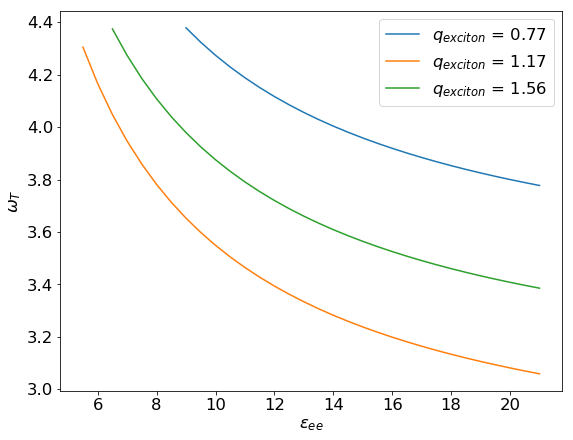

In [85]:
plt.rcParams['figure.figsize'] = [9,7]
fig, ax = plt.subplots()
ax.plot(ee2, trion2, label=r'$q_{exciton}$ = 0.77')
ax.plot(ee1, trion1, label=r'$q_{exciton}$ = 1.17')
ax.plot(ee3, trion3, label=r'$q_{exciton}$ = 1.56')

ax.legend(loc = 'upper right')
plt.rcParams.update({'font.size': 16.5})
plt.xlabel(r'$\epsilon_{ee}$'); plt.ylabel(r'$\omega_T$')
plt.show()